## Tabs vs Spaces

Thanks to [@daniel_budd](https://twitter.com/daniel_budd) and [@coolaj86](https://twitter.com/coolaj86) for pointing me to the recent post from David Robinson on the stackoverflow blog titled [Developers Who Use Spaces Make More Money Than Those Who Use Tabs](https://stackoverflow.blog/2017/06/15/developers-use-spaces-make-money-use-tabs/).

Before beginning my critique of this work, let me clear the air about a few things.  This is not a "take-down" of that blog post.  While I have some critical things to say about the post, I wouldn't say it has any blunders in it.  Think of my post in the same way you listen to a political pundit sharing their commentator of a politician's speech.

The post is an exploration of data provided by survey respondents with a sample size of 28,657.  Generally speaking, that's more than adequate to test hypothesis and expect a statistically significant measurement.  Except we need to keep in mind that this survey did not *set out* to test the headline.  The result was found after the fact.  How many other novel tests were done on the data before arriving at this one?  Could this be spurious or a cherry picked result?  It could be, but given the sample size and intuitive possibility (perhaps remote) of a relationship between income indentation style.

The post asserts:

> "Analyzing the data leads us to an interesting conclusion. Coders who use spaces for indentation make more money than ones who use tabs, even if they have the same amount of experience"

Technically, the conclusion is that responders who self-reported to use exclusively spaces to indent also self-reported to earn more money, but I think that may be a pedantic point.

The post goes on to do some good follow up steps, such as check if the result varies by job title or programming language.  Language in particular seems like a very reasonable explanation since different IDEs and languages themselves sometimes require or recommend one method of indentation over the other.  The post shows that the phenomenon is independent of job title and (quite surprisingly to me) independent of language.

Not only is the reported effect independent of language, it's true across *all* languages.  For me, this makes it unlikely is some effect explainable due to high variance in the sample.

So shall we conclude that in the "holy war" of tabs vs spaces that team spaces are the superior programmers and therefore capable of commanding higher salaries?  Or is it that team spaces are weaker programmers, having spent less time practicing their craft and more time learning the negotiating skills to achieve higher pay?

### Deeper Inspection

I did my own investigation, looking for a confounding factor (like professional vs. hobbiest) which could explain the data.  I failed to find anything *in this survey* that seemed like a reasonable explanation.  That leaves us with three possibilities. 

1) I was not clever enough to find the other factor 

2) the survey failed to ask an important question which could better explain this data 

3) The affect is a real but spurious result.


I looked around for other effects which correlated strongly with lower pay and found that people who pronounce "gif" like "gee eye eff" report notably lower wages across all levels of experience as well.  In the case of spaces vs. tabs, one might argue that this has some loose relationship with ability.  Yet clearly, how one pronounces a word should not have measurable impact on income.

Could the pronunciation issue be cultural?  Indeed, when I reduced my analysis down to residents of the USA only, the affect goes away.  Could the same be true for tabs vs. space?  The original post already addressed this.  I confirmed their result - use of spaces correlates with higher reported income mostly independent of country.  Selecting only USA does *reduce* the affect size, but not eliminate it.  

Although refining the analysis in this way reveals two important curiosities.

First, for anyone with at least one year of experience, the advantage in earning for space-users is consistently about a ~12% higher than their tab-pressing counterparts.  This difference seems consistent across years experience.  This is very peculiar to me and makes me doubt the usefulness of the result.  If you told me that graduating from an ivy league school brought a consistent percentage income advantage, I would find that plausible.  But after 20 years of experience, wouldn't the earning potential of these developers level out to being less and less dependant on their indentation style?

Second, users that report being tab-indentors or using *both* spaces and tabs look identical.  If there were some advantage that helped space-indentors earn more, we should see that those who use *both* pick up some of that advantage and sit cleaning in between the other two options.  We don't see that in the data.

### Conclusion

The affect reported appears consistent with the response data.  That is to say, people who report using spaces to indent also report earning more.  While I wasn't able to find some elegant explanatory confounding factor for this difference, I find the result a bit misleading.  If using spaces truly brought 12% more income on average, that's a large enough increase that we'd see developers migrating to spaces-only coding for income reasons.  The fact that coders who use both aren't somewhere in the middle also leads me to believe this is a spurious result.

While I have no evidence for this, if I had to guess, I suspect this phenomenon is actually an artifact of the survey itself.  Perhaps people who speed through answering the first response to every question (or something like that) ended up introducing just enough bias to these results.  While i have the response, I don't know the ordering of the choices or if they were properly randomized during the survey, so I can't test that hypothesis.

Either way, to me, this is a curiosity at best (which is probably consistent with the spirit of the original post).  It would be inadvisable to act upon this (such as checking indentation in job applicant github repos).  I consider this to most likely be an artifact of the study design, but an artifact which could be further tested as a formal hypothesis in a follow up if someone cared to do that.

### Try it yourself!

I admire Stack Overflow for sharing the anonymized responses openly.  This enabled me to do my own exploration of the data, seen below.

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import requests
import pandas as pd
import numpy as np
from io import StringIO

In [2]:
# https://drive.google.com/uc?export=download&id=0B6ZlG_Eygdj-c1kzcmUxN05VUXM
fname = 'survey_results_public.csv'

In [49]:
df = pd.read_csv(fname)

In [50]:
def min_years(s):
    if s == 'Less than a year':
        return 0
    if type(s) == float:
        return None
    i = s.find(' ')
    x = s[0:i]
    return int(x)

df['years'] = df['YearsProgram'].apply(min_years)

In [51]:
factor = 'TabsSpaces'

In [52]:
gb = df.groupby([factor, 'years'])['Salary'].mean()

### Reproducibility

Before exploring the observed phenomenon deeper, let's first confirm it actually exists!  As you see below, it does.  I was able to replicate the original finding.

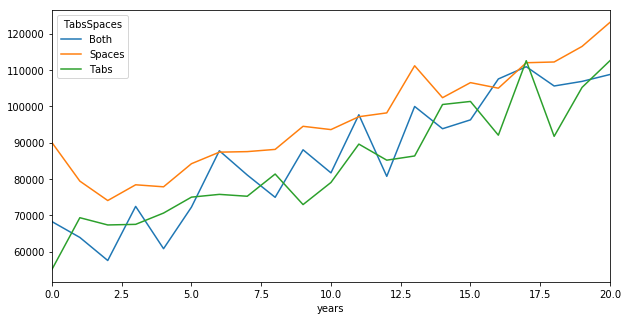

In [71]:
df2 = pd.DataFrame(gb)
df2.reset_index(inplace=True)
df3 = df2.pivot(columns=factor, index='years', values='Salary')
df3.plot(figsize=(10,5))

In [55]:
factor = 'PronounceGIF'

In [56]:
gb = df.groupby([factor, 'years'])['Salary'].mean()

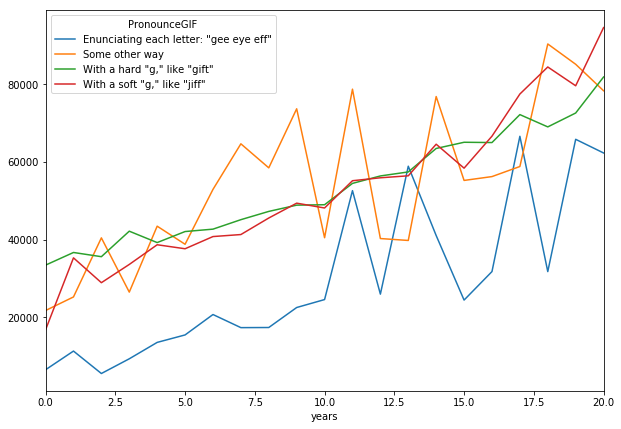

In [57]:
df2 = pd.DataFrame(gb)
df2.reset_index(inplace=True)
df3 = df2.pivot(columns=factor, index='years', values='Salary')
df3.plot(figsize=(10,7))

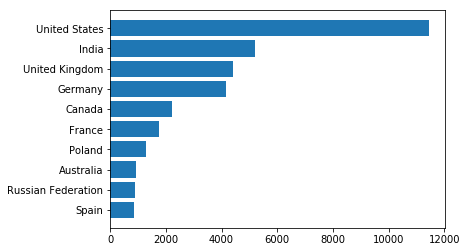

In [58]:
h = df.groupby(['Country'])['Respondent'].count()
h.sort_values(ascending=False, inplace=True)
h = h[0:10]
h = h.sort_values(ascending=True)
x = np.arange(len(h))
plt.barh(x, h)
plt.gca().set_yticks(x)
plt.gca().set_yticklabels(h.index)
plt.show()

In [59]:
usa = df['Country'] == 'United States'
df = df[usa]

In [60]:
factor = 'TabsSpaces'

In [61]:
gb = df.groupby([factor, 'years'])['Salary'].mean()

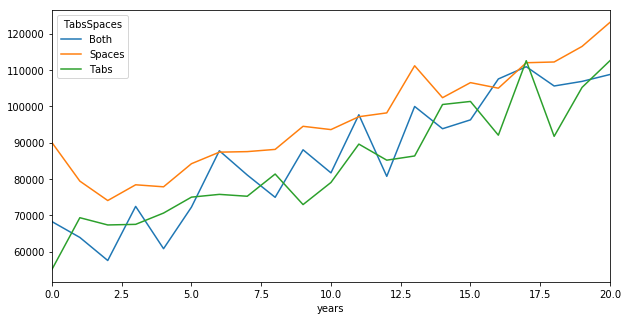

In [70]:
df2 = pd.DataFrame(gb)
df2.reset_index(inplace=True)
df3 = df2.pivot(columns=factor, index='years', values='Salary')
df3.plot(figsize=(10,5))
plt.show()

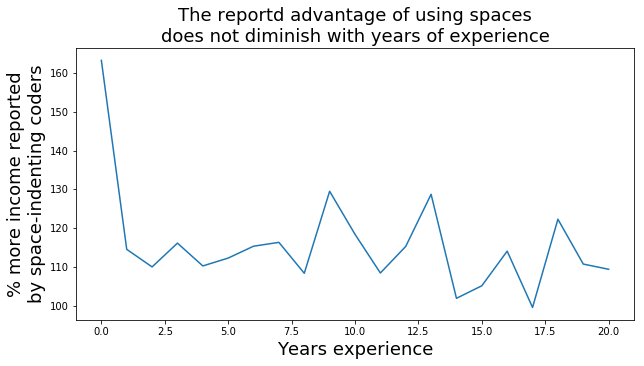

In [67]:
diff = df3['Spaces'] / df3['Tabs'] * 100
plt.figure(figsize=(10,5))
plt.plot(diff)
plt.title("The reportd advantage of using spaces\ndoes not diminish with years of experience", fontsize=18)
plt.xlabel('Years experience', fontsize=18)
plt.ylabel('% more income reported\nby space-indenting coders', fontsize=18)
plt.show()